# Exercise: Coin Detection

This notebook is on detecting the coins in a photograph.

### Import necessary modules

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from skimage.feature import peak_local_max
from scipy import ndimage as ndi

### Get necessary images

In [2]:
ASSET_DIR = Path('Coins')
coins = cv.imread(str(ASSET_DIR / 'coins.png'), cv.IMREAD_GRAYSCALE)
assert coins is not None
p = cv.imread(str(ASSET_DIR / 'Penny.png'), cv.IMREAD_GRAYSCALE)
assert p is not None
n = cv.imread(str(ASSET_DIR / 'Nickel.png'), cv.IMREAD_GRAYSCALE)
assert n is not None
d = cv.imread(str(ASSET_DIR / 'Dime.png'), cv.IMREAD_GRAYSCALE)
assert d is not None
q = cv.imread(str(ASSET_DIR / 'Quarter.png'), cv.IMREAD_GRAYSCALE)
assert q is not None

### Display the images
Note: To run the following code, make sure the images are in a folder named 'coins'. If not, modify the path in the code.

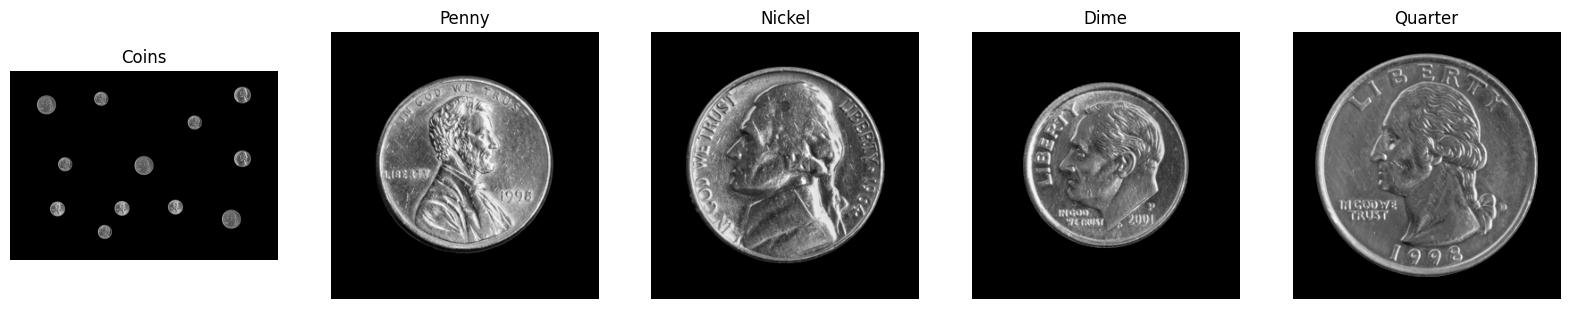

In [3]:
# Display the images
plt.figure(figsize=(20, 20))
plt.subplot(1,5,1)
plt.imshow(coins, cmap='gray')
plt.title('Coins')
plt.axis('off')
plt.subplot(1,5,2)
plt.imshow(p, cmap='gray')
plt.title('Penny')
plt.axis('off')
plt.subplot(1,5,3)
plt.imshow(n, cmap='gray')
plt.title('Nickel')
plt.axis('off')
plt.subplot(1,5,4)
plt.imshow(d, cmap='gray')
plt.title('Dime')
plt.axis('off')
plt.subplot(1,5,5)
plt.imshow(q, cmap='gray')
plt.title('Quarter')
plt.axis('off')
plt.show()


### Search for coin template and plot locations of matched coins

In order to detect coins, we search for the coin template in the larger image. We do this for each type of coin using the cv2.matchTemplate function.

Assumption: None of the coins are rotated in the image. They appear in the same orientation as in the remplate images

In [4]:
penny_matches = cv.matchTemplate(coins, p, cv.TM_CCOEFF_NORMED)
nickel_matches = cv.matchTemplate(coins, n, cv.TM_CCOEFF_NORMED)
dime_matches = cv.matchTemplate(coins, d, cv.TM_CCOEFF_NORMED)
quarter_matches = cv.matchTemplate(coins, q, cv.TM_CCOEFF_NORMED)

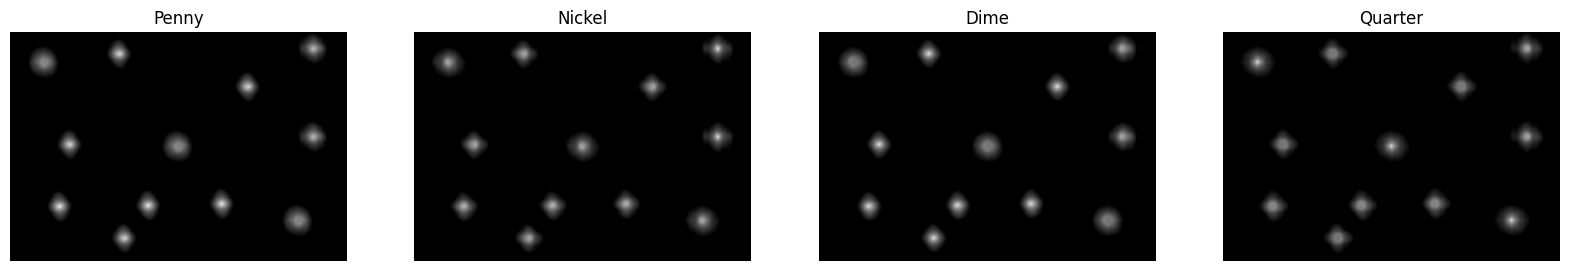

In [5]:
plt.figure(figsize=(20, 20))
plt.subplot(1,4,1)
plt.imshow(penny_matches, cmap='gray', vmin=0, vmax=1.0)
plt.title('Penny')
plt.axis('off')
plt.subplot(1,4,2)
plt.imshow(nickel_matches, cmap='gray', vmin=0, vmax=1.0)
plt.title('Nickel')
plt.axis('off')
plt.subplot(1,4,3)
plt.imshow(dime_matches, cmap='gray', vmin=0, vmax=1.0)
plt.title('Dime')
plt.axis('off')
plt.subplot(1,4,4)
plt.imshow(quarter_matches, cmap='gray', vmin=0, vmax=1.0)
plt.title('Quarter')
plt.axis('off')
plt.show()

It seems as if all coins are detected for each type. However, the brightness is higher for the correct coin type. This is because the template is a perfect match for the coin in the image.

### Filtering out false positives

We can filter out false positives by applying a threshold to the match score. If the match score is above a certain threshold, we consider it a match. Otherwise, we ignore it.

Assumption: Here we make an assumption that the match score for the correct coin type is higher than the match score for the other coin types and that a threshold of 0.9 is sufficient to filter out false positives.

In [6]:
def detect_peaks(result, threshold=0.9, min_distance=20):
    peaks = peak_local_max(result, min_distance=min_distance, threshold_abs=threshold)
    return peaks

# Detect peaks for each coin type
penny_peaks = detect_peaks(penny_matches)
nickel_peaks = detect_peaks(nickel_matches)
dime_peaks = detect_peaks(dime_matches)
quarter_peaks = detect_peaks(quarter_matches)


print(f'Penny peaks: {penny_peaks}')
print(f'Nickel peaks: {nickel_peaks}')
print(f'Dime peaks: {dime_peaks}')
print(f'Quarter peaks: {quarter_peaks}')


Penny peaks: [[1638 2016]
 [1654 1316]
 [1662  472]]
Nickel peaks: [[ 166 2892]
 [1002 2892]]
Dime peaks: [[1074  572]
 [1962 1092]
 [ 214 1044]
 [ 526 2268]]
Quarter peaks: [[ 294  328]
 [1090 1604]
 [1794 2748]]


### Calculate the total value of the coins

In [7]:
total_value = len(penny_peaks) + 5 * len(nickel_peaks) + 10 * len(dime_peaks) + 25 * len(quarter_peaks) # cents value
print(f'Total value: ${total_value / 100:.2f}')

Total value: $1.28


### Display the results

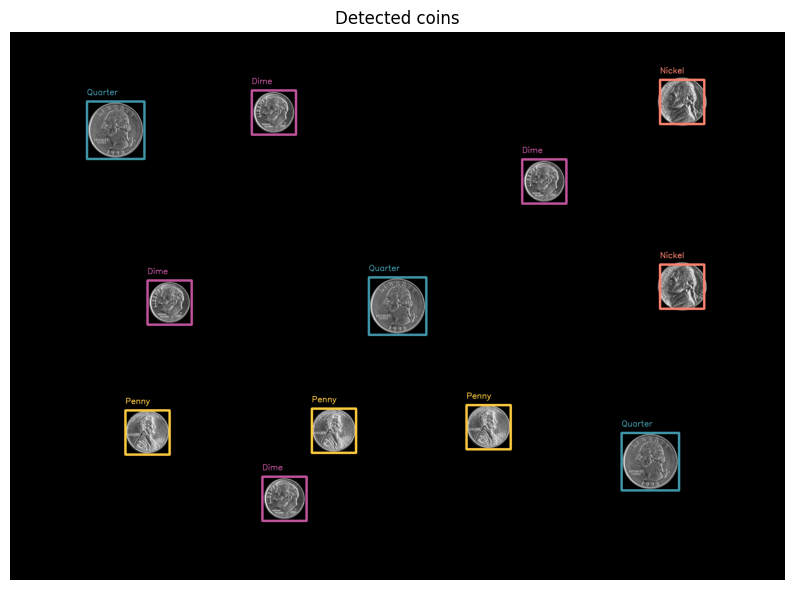

In [8]:
image = cv.cvtColor(coins, cv.COLOR_GRAY2BGR)
for peak in penny_peaks:
    cv.rectangle(img = image, pt1 = (peak[1] + 50, peak[0] + 50), pt2 = (peak[1] + 250, peak[0] + 250), color = (255, 203, 62), thickness = 10)
    cv.putText(image, 'Penny', (peak[1] + 50, peak[0] + 20), cv.FONT_HERSHEY_SIMPLEX, 1.2, (255, 203, 62), 2, cv.LINE_AA)

for peak in nickel_peaks:
    cv.rectangle(img = image, pt1 = (peak[1] + 50, peak[0] + 50), pt2 = (peak[1] + 250, peak[0] + 250), color = (251, 131, 111), thickness = 10)
    cv.putText(image, 'Nickel', (peak[1] + 50, peak[0] + 20), cv.FONT_HERSHEY_SIMPLEX, 1.2, (251, 131, 111), 2, cv.LINE_AA)

for peak in dime_peaks:
    cv.rectangle(img = image, pt1 = (peak[1] + 50, peak[0] + 50), pt2 = (peak[1] + 250, peak[0] + 250), color = (193, 84, 156), thickness = 10)
    cv.putText(image, 'Dime', (peak[1] + 50, peak[0] + 20), cv.FONT_HERSHEY_SIMPLEX, 1.2, (193, 84, 156), 2, cv.LINE_AA)

for peak in quarter_peaks:
    cv.rectangle(img = image, pt1 = (peak[1] + 20, peak[0] + 20), pt2 = (peak[1] + 280, peak[0] + 280), color = (64, 151, 170), thickness = 10)
    cv.putText(image, 'Quarter', (peak[1] + 20, peak[0] -10), cv.FONT_HERSHEY_SIMPLEX, 1.2, (64, 151, 170), 2, cv.LINE_AA)

plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis('off')
plt.title('Detected coins')
plt.show()

### Assumptions

The following assumptions were made in this exercise:

* The coins are not rotated in the image. They appear in the same orientation as in the template images.
* The match score for the correct coin type is higher than the match score for the other coin types.
* A threshold of 0.9 is sufficient to filter out false positives.